In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

budu pracovat s daty počasí z Ruzeně, ale jak to tak v ČR bývá:
data jsou na hovno a nebo placený - děsný kocourkov

In [3]:
RUZYNE_DATA_FILENAME = "P1PRUZ01.xls"
RUZYNE_DATA_URL = "https://data4pydata.s3-eu-west-1.amazonaws.com/pyladies/P1PRUZ01.xls"

In [4]:
# stáhne data pokud ještě nejsou k dispozici
import os
import urllib.request

def save_file_from_url(url, target_filename):
    if not os.path.isfile(target_filename):
        print("Stahuji data - počkej chvíli ...")
        urllib.request.urlretrieve(url, target_filename)
    print(f"Data jsou v souboru {target_filename}")

In [5]:
save_file_from_url(RUZYNE_DATA_URL, RUZYNE_DATA_FILENAME)

Data jsou v souboru P1PRUZ01.xls


In [6]:

# otevření Excel souboru
excel_data_ruzyne = pd.ExcelFile(RUZYNE_DATA_FILENAME)

In [7]:
excel_data_ruzyne.sheet_names

['geografie stanice',
 'teplota průměrná',
 'teplota maximální',
 'teplota minimální',
 'rychlost větru',
 'tlak vzduchu',
 'vlhkost vzduchu',
 'úhrn srážek',
 'celková výška sněhu',
 'sluneční svit']

In [8]:
# načti data z jednoho listu a zobraz prvních 5
teplota_prumerna = excel_data_ruzyne.parse("teplota průměrná")
teplota_prumerna.head(5)

,Průměrná denní teplota vzduchu ve °C,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,stanice: P1PRUZ01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rok,měsíc,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
3,1961,01,-2.0,-1.9,0.1,-0.3,0.4,-0.3,0.8,1.0,...,-2.4,-3.4,-3.9,-7.4,-9.8,-10.3,-9.0,0.7,4.7,4.7
4,1961,02,1.3,1.2,0.5,0.7,-3.3,0.6,3.1,2.3,...,2.8,3.0,3.4,0.9,2.6,4.4,5.8,NaN,NaN,NaN


In [9]:
teplota_prumerna = excel_data_ruzyne.parse("teplota průměrná", skiprows=3)
teplota_prumerna.head(5)

,rok,měsíc,1.,2.,3.,4.,5.,6.,7.,8.,...,22.,23.,24.,25.,26.,27.,28.,29.,30.,31.
0,1961,1,-2.0,-1.9,0.1,-0.3,0.4,-0.3,0.8,1.0,...,-2.4,-3.4,-3.9,-7.4,-9.8,-10.3,-9.0,0.7,4.7,4.7
1,1961,2,1.3,1.2,0.5,0.7,-3.3,0.6,3.1,2.3,...,2.8,3.0,3.4,0.9,2.6,4.4,5.8,NaN,NaN,NaN
2,1961,3,2.1,3.9,4.4,3.1,5.7,4.7,7.2,6.8,...,0.5,5.2,7.1,6.6,10.1,3.5,1.3,4.7,7.4,4.8
3,1961,4,8.1,8.4,7.8,10.0,13.5,16.2,17.0,10.6,...,13.5,10.9,11.7,11.0,12.4,10.9,11.4,11.4,12.5,NaN
4,1961,5,10.3,12.4,11.8,12.1,16.2,14.3,11.8,8.3,...,11.8,13.6,14.6,16.3,15.8,12.3,6.2,6.7,8.3,13.2


In [10]:
# uspořádám na tidy data - metodou melt()
teplota_prumerna_tidy = teplota_prumerna.melt(
    id_vars=["rok", "měsíc"], var_name="den", value_name="teplota průměrná"
)
teplota_prumerna_tidy.head(5)

,rok,měsíc,den,teplota průměrná
0,1961,1,1.,-2.0
1,1961,2,1.,1.3
2,1961,3,1.,2.1
3,1961,4,1.,8.1
4,1961,5,1.,10.3


In [11]:
# chci hodit rok-měsíc-den dohromady: 1) přejmenovat na ENG 2) metoda pd.to_datetime()
# 3) každej měsíc jinej počet dní -> chyby hodit do NaT (not a time)

datum = pd.to_datetime(
    teplota_prumerna_tidy[["rok", "měsíc", "den"]].rename(
        columns={"rok": "year", "měsíc": "month", "den": "day"}
    ),
    errors="coerce",
)

In [12]:
datum

0       1961-01-01
1       1961-02-01
2       1961-03-01
3       1961-04-01
4       1961-05-01
           ...    
21571   2018-08-31
21572          NaT
21573   2018-10-31
21574          NaT
21575   2018-12-31
Length: 21576, dtype: datetime64[ns]

In [13]:
# měl bych hodit do časového pásma, ať můžu porovnávat s jinými,
# problém s přestupným rokem, letním a zimním časem - jinde velký, tu ne
datum_localized = datum.dt.tz_localize("Europe/Prague")
datum_localized

0       1961-01-01 00:00:00+01:00
1       1961-02-01 00:00:00+01:00
2       1961-03-01 00:00:00+01:00
3       1961-04-01 00:00:00+01:00
4       1961-05-01 00:00:00+01:00
                   ...           
21571   2018-08-31 00:00:00+02:00
21572                         NaT
21573   2018-10-31 00:00:00+01:00
21574                         NaT
21575   2018-12-31 00:00:00+01:00
Length: 21576, dtype: datetime64[ns, Europe/Prague]

In [14]:
teplota_prumerna_tidy = teplota_prumerna_tidy.assign(datum=datum)
teplota_prumerna_tidy


,rok,měsíc,den,teplota průměrná,datum
0,1961,1,1.,-2.0,1961-01-01
1,1961,2,1.,1.3,1961-02-01
2,1961,3,1.,2.1,1961-03-01
3,1961,4,1.,8.1,1961-04-01
4,1961,5,1.,10.3,1961-05-01
...,...,...,...,...,...
21571,2018,8,31.,15.7,2018-08-31
21572,2018,9,31.,NaN,NaT
21573,2018,10,31.,7.8,2018-10-31
21574,2018,11,31.,NaN,NaT


In [15]:
teplota_prumerna_tidy.isna().sum()

rok                   0
měsíc                 0
den                   0
teplota průměrná    392
datum               392
dtype: int64

In [16]:
teplota_prumerna_tidy_clean = teplota_prumerna_tidy.dropna()

In [17]:

def extract_and_clean_chmi_excel_sheet(excel_data, sheet_name):
    """Parse ČHMÚ historical meteo excel data"""
    # načti list z excel souboru a převeď na tidy data formát
    data_tidy = (
        excel_data.parse(sheet_name, skiprows=3)
        .melt(id_vars=["rok", "měsíc"], var_name="den", value_name=sheet_name)
        .dropna()
    )
    # vytvoř časovou řadu datumů
    datum = pd.to_datetime(
        data_tidy[["rok", "měsíc", "den"]].rename(
            columns={"rok": "year", "měsíc": "month", "den": "day"}
        )
    )
    # přidej sloupec datum jako index a odstraň den, měsíc, rok a vrať setříděný výsledek
    return (
        data_tidy.assign(datum=datum)
        .set_index("datum")
        .drop(columns=["rok", "měsíc", "den"])
        .sort_index()
    )

In [18]:
# otevři Excel soubor
excel_data_ruzyne = pd.ExcelFile("P1PRUZ01.xls")
# načti všechny listy kromě prvního
extracted_sheets = (
    extract_and_clean_chmi_excel_sheet(excel_data_ruzyne, sheet_name)
    for sheet_name in excel_data_ruzyne.sheet_names[1:]
)
# spoj všechny listy do jednoho DataFrame
ruzyne_tidy = pd.concat(extracted_sheets, axis=1)

In [19]:
ruzyne_tidy

,teplota průměrná,teplota maximální,teplota minimální,rychlost větru,tlak vzduchu,vlhkost vzduchu,úhrn srážek,celková výška sněhu,sluneční svit
datum,,,,,,,,,
1961-01-01,-2.0,1.0,-3.4,1.7,969.9,87.0,0.0,6.0,0.4
1961-01-02,-1.9,-1.2,-2.4,3.0,965.2,89.0,0.0,4.0,0.0
1961-01-03,0.1,1.0,-2.6,2.7,952.3,80.0,0.0,3.0,0.0
1961-01-04,-0.3,2.1,-2.0,3.3,953.6,87.0,0.0,3.0,1.0
1961-01-05,0.4,2.8,-4.3,6.3,963.9,81.0,0.0,2.0,2.2
...,...,...,...,...,...,...,...,...,...
2018-12-27,4.0,6.5,2.7,5.4,981.4,88.0,0.0,0.0,0.5
2018-12-28,3.9,6.2,0.3,3.9,981.5,82.0,0.0,0.0,3.9
2018-12-29,2.2,4.8,1.3,5.8,983.8,87.0,0.8,0.0,0.5


In [20]:
# výběr pomocí loc

ruzyne_tidy.loc[pd.Timestamp(2017, 12, 24) : pd.Timestamp(2018, 1, 1)]

,teplota průměrná,teplota maximální,teplota minimální,rychlost větru,tlak vzduchu,vlhkost vzduchu,úhrn srážek,celková výška sněhu,sluneční svit
datum,,,,,,,,,
2017-12-24,6.1,7.0,5.5,7.7,979.5,82.0,0.0,0.0,0.3
2017-12-25,1.7,5.7,-0.6,4.0,975.4,88.0,0.0,0.0,0.0
2017-12-26,1.2,4.5,-4.5,3.7,964.1,85.0,0.0,0.0,1.6
2017-12-27,-0.7,3.4,-3.5,2.7,949.1,91.0,2.2,0.0,0.8
2017-12-28,1.0,1.5,-0.8,5.7,951.8,87.0,7.0,0.0,0.0
2017-12-29,-1.7,1.2,-3.8,6.3,965.0,79.0,0.1,1.0,1.9
2017-12-30,2.5,4.8,-3.8,5.7,962.7,86.0,1.8,1.0,0.2
2017-12-31,9.1,11.5,4.5,6.7,964.6,81.0,0.5,0.0,1.2
2018-01-01,4.1,9.1,0.4,4.7,962.9,77.0,0.0,0.0,0.4


In [21]:
# vyberu jeden celý rok přes .index.year:

ruzyne_tidy.loc[ruzyne_tidy.index.year == 2018]

,teplota průměrná,teplota maximální,teplota minimální,rychlost větru,tlak vzduchu,vlhkost vzduchu,úhrn srážek,celková výška sněhu,sluneční svit
datum,,,,,,,,,
2018-01-01,4.1,9.1,0.4,4.7,962.9,77.0,0.0,0.0,0.4
2018-01-02,3.9,5.7,0.5,6.9,965.8,81.0,1.0,0.0,0.5
2018-01-03,4.6,7.6,0.5,9.3,952.9,81.0,7.9,0.0,0.8
2018-01-04,4.5,5.7,3.9,5.9,955.9,82.0,0.9,0.0,0.5
2018-01-05,7.3,9.0,4.1,5.6,958.5,80.0,0.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-27,4.0,6.5,2.7,5.4,981.4,88.0,0.0,0.0,0.5
2018-12-28,3.9,6.2,0.3,3.9,981.5,82.0,0.0,0.0,3.9
2018-12-29,2.2,4.8,1.3,5.8,983.8,87.0,0.8,0.0,0.5


In [22]:
# kombo:

ruzyne_tidy.loc[
    ruzyne_tidy.index.is_quarter_start
    & (ruzyne_tidy.index.weekday == 0)
    & (ruzyne_tidy.index.year < 1989)
]

,teplota průměrná,teplota maximální,teplota minimální,rychlost větru,tlak vzduchu,vlhkost vzduchu,úhrn srážek,celková výška sněhu,sluneční svit
datum,,,,,,,,,
1962-01-01,0.2,2.4,-4.0,4.3,966.5,75.0,0.0,1.0,0.0
1962-10-01,15.6,22.4,8.3,1.7,976.6,73.0,0.0,0.0,8.8
1963-04-01,1.0,2.9,0.6,2.7,971.9,96.0,1.3,0.0,0.0
1963-07-01,17.3,21.2,15.4,2.0,972.1,79.0,0.0,0.0,1.0
1968-01-01,-4.1,0.4,-6.5,4.0,958.0,82.0,0.4,1.0,0.0
1968-04-01,8.5,17.6,0.2,4.3,973.0,55.0,0.0,0.0,11.8
1968-07-01,20.9,25.9,11.3,3.7,980.8,62.0,0.0,0.0,14.3
1973-01-01,-2.1,3.8,-9.2,3.3,983.5,57.0,0.0,0.0,6.3
1973-10-01,9.7,12.8,6.2,1.3,977.7,74.0,0.0,0.0,0.0


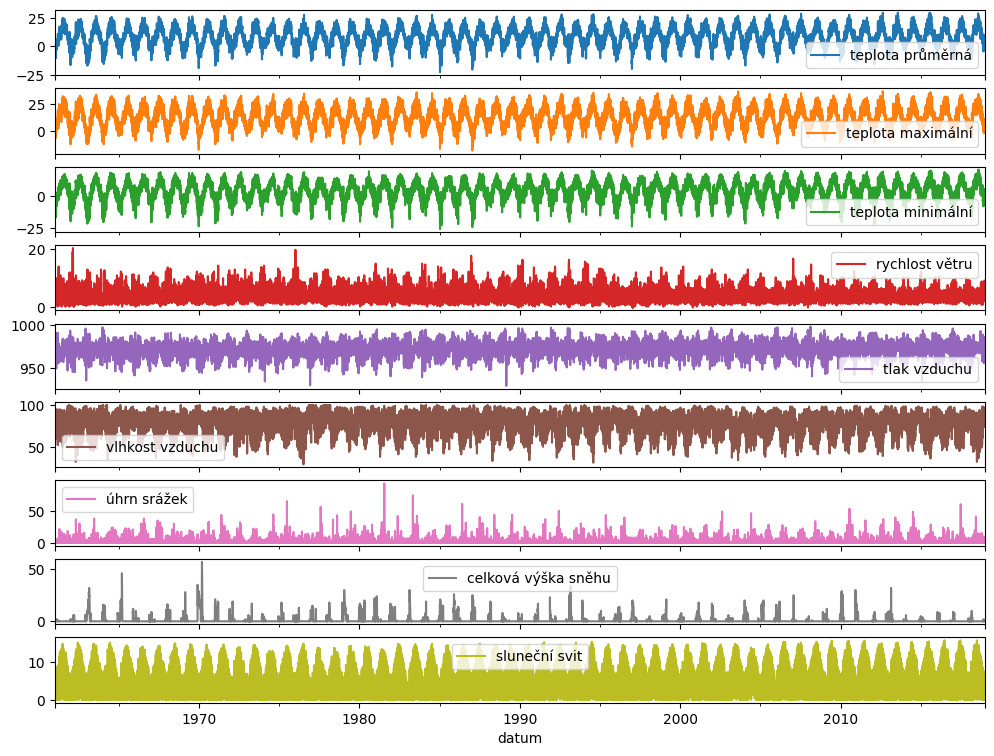

In [24]:
# kreslim:
ruzyne_tidy.plot(subplots=True, figsize=(12, 9));

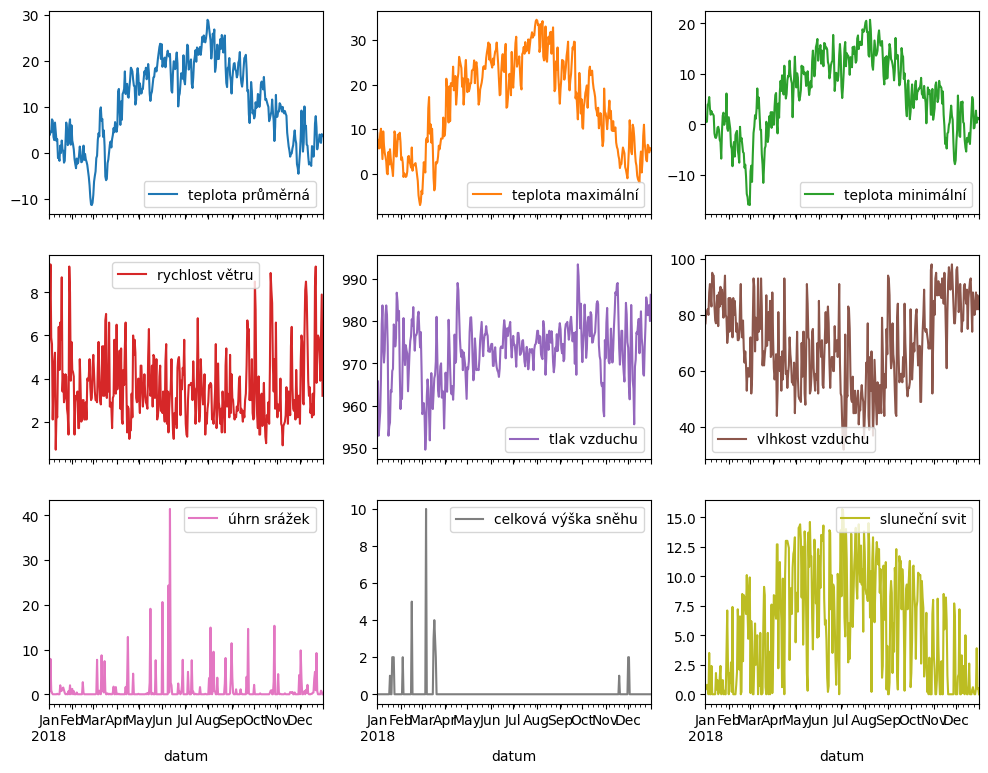

In [25]:
ruzyne_tidy[ruzyne_tidy.index.year == 2018].plot(
    subplots=True, layout=(3, 3), figsize=(12, 9)
);

In [26]:
# Statesteka:
ruzyne_tidy.describe()

,teplota průměrná,teplota maximální,teplota minimální,rychlost větru,tlak vzduchu,vlhkost vzduchu,úhrn srážek,celková výška sněhu,sluneční svit
count,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000,21184.000000
mean,8.417896,12.970143,4.078795,4.179343,972.431085,76.577747,1.399901,1.052020,4.728998
std,8.184324,9.472715,7.223863,2.234592,8.062309,12.406828,3.832025,3.746289,4.271356
min,-22.600000,-18.300000,-25.500000,0.000000,928.700000,29.000000,0.000000,0.000000,0.000000
25%,2.100000,5.200000,-0.700000,2.700000,967.600000,68.000000,0.000000,0.000000,0.500000
50%,8.700000,13.300000,4.400000,3.700000,972.800000,78.000000,0.000000,0.000000,3.900000
75%,14.900000,20.500000,9.900000,5.300000,977.600000,86.000000,1.000000,0.000000,8.100000
max,29.500000,37.400000,20.700000,20.300000,998.700000,100.000000,93.300000,57.000000,15.700000


In [27]:
ruzyne_tidy[ruzyne_tidy.index.month == 1].describe()
# f letnu

,teplota průměrná,teplota maximální,teplota minimální,rychlost větru,tlak vzduchu,vlhkost vzduchu,úhrn srážek,celková výška sněhu,sluneční svit
count,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000
mean,-1.608231,1.089989,-4.499722,4.703059,973.081869,85.147386,0.728754,4.538932,1.714405
std,5.204560,5.042629,5.737259,2.977468,10.237599,7.383823,1.546440,6.269001,2.247083
min,-22.600000,-18.300000,-25.500000,0.000000,933.900000,54.000000,0.000000,0.000000,0.000000
25%,-4.675000,-2.000000,-8.000000,2.300000,965.925000,80.000000,0.000000,0.000000,0.000000
50%,-1.000000,1.200000,-3.450000,4.000000,973.300000,86.000000,0.000000,1.000000,0.500000
75%,1.900000,4.400000,-0.300000,6.700000,980.475000,91.000000,0.700000,7.000000,3.000000
max,12.500000,15.800000,8.500000,19.700000,997.700000,100.000000,14.700000,30.000000,8.400000


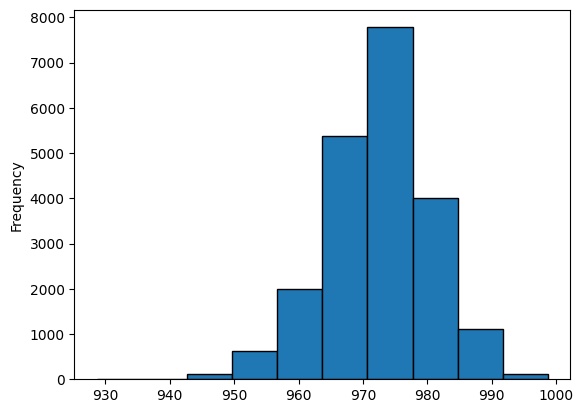

In [28]:
# hestogrem:

ruzyne_tidy["tlak vzduchu"].plot.hist(edgecolor="black");

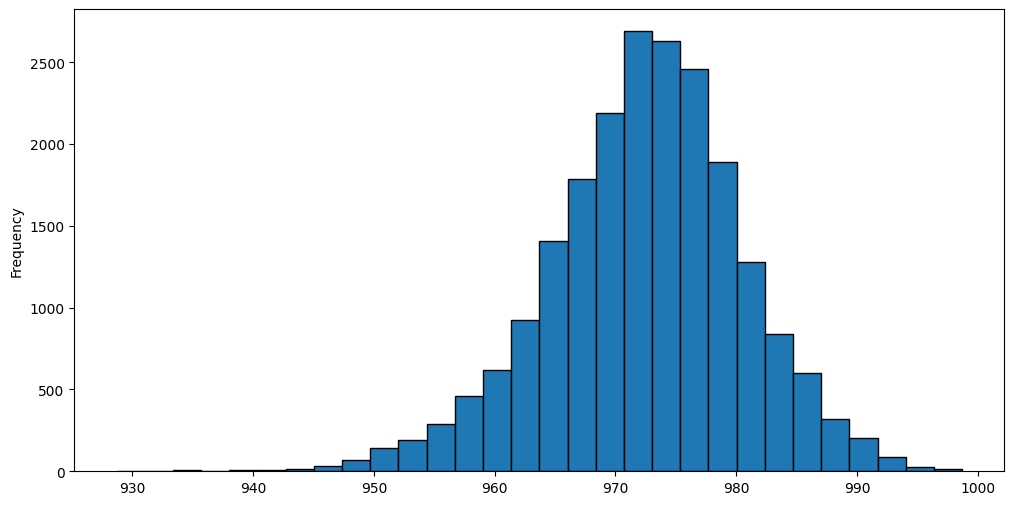

In [39]:
# počet chlévů - bins=xy:
ruzyne_tidy["tlak vzduchu"].plot.hist(density=False, bins=30, figsize=(12, 6), edgecolor="black");

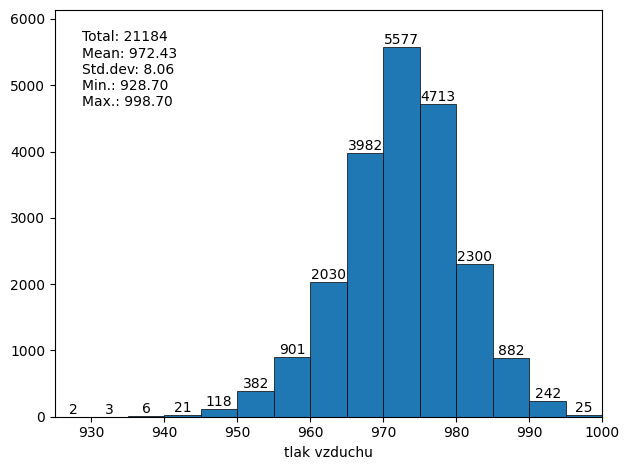

In [30]:
# přidám physt Honzy Pipka:

import physt

histogram = physt.h1(ruzyne_tidy["tlak vzduchu"], "fixed_width", bin_width=5)
histogram.plot(edgecolor="black", show_values=True, show_stats=True);

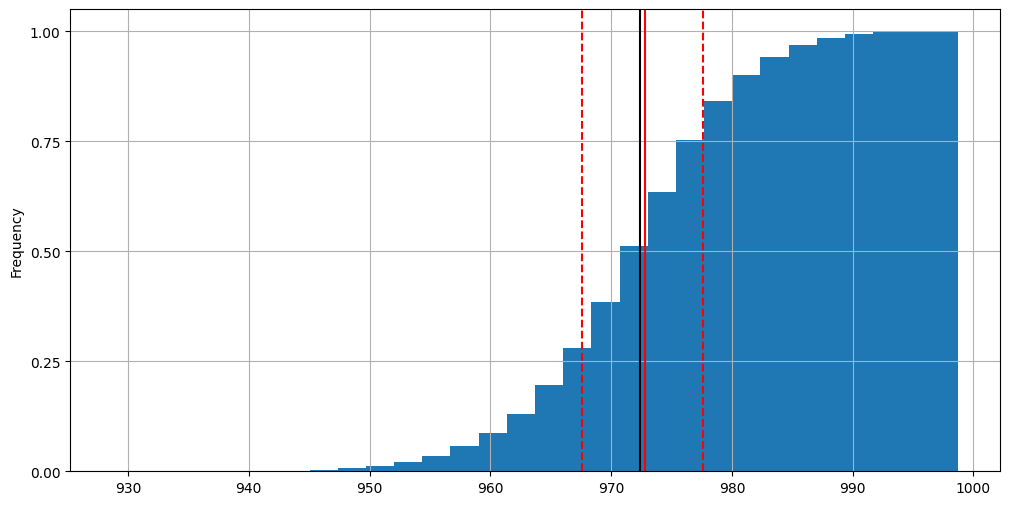

In [38]:
# kumulativní součet:
ax = ruzyne_tidy["tlak vzduchu"].plot.hist(
    bins=30, figsize=(12, 6), cumulative=True, density=True, grid=True
)
ax.set_yticks(np.arange(0, 1.1, 0.25))
ax.axvline(ruzyne_tidy["tlak vzduchu"].mean(), color="k")
ax.axvline(ruzyne_tidy["tlak vzduchu"].median(), color="r")
ax.axvline(ruzyne_tidy["tlak vzduchu"].quantile(0.25), color="r", ls="--")
ax.axvline(ruzyne_tidy["tlak vzduchu"].quantile(0.75), color="r", ls="--")

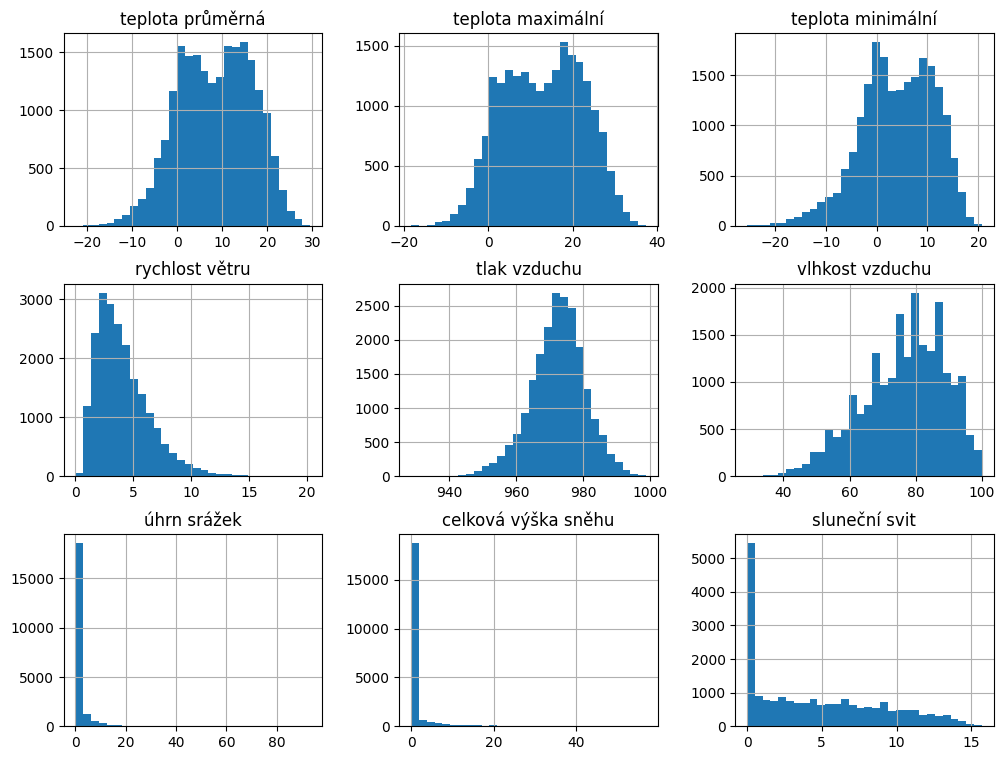

In [40]:

ruzyne_tidy.hist(figsize=(12, 9), bins=30);

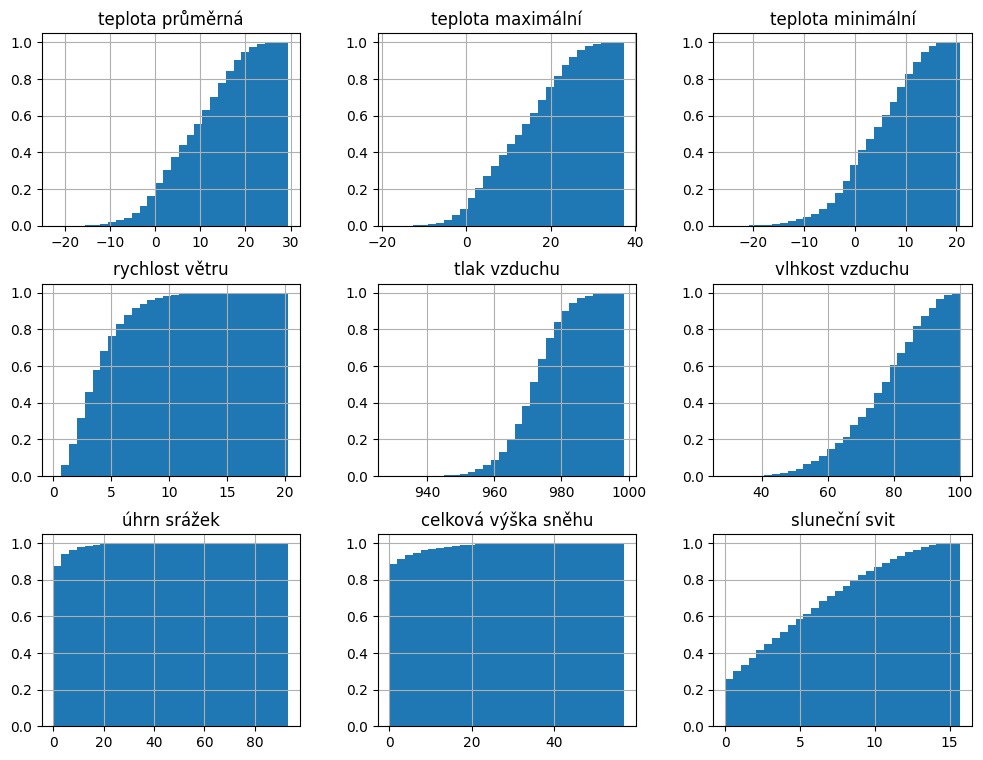

In [41]:
ruzyne_tidy.hist(figsize=(12, 9), bins=30, cumulative=True, density=True);

Mnoho zámých distribučních funkcí:
https://en.wikipedia.org/wiki/Log-normal_distribution

Zabalíme do funkce vykreslovaní histogramu spolu se střední hodnotou a kvantily, které jsme použili již dříve. Poté použijeme velice užitečnou knihovnu seaborn na vykreslení histogramů pro jednotlivé veličiny.

In [43]:
def hist_plot_with_extras(data, bins=30, cumulative=False, density=False, **kwargs):
    """Plot histogram with mean and quantiles"""
    ax = kwargs.pop("ax", plt.gca())
    ax.hist(data, bins=bins, cumulative=cumulative, density=density, **kwargs)
    ax.grid(True)
    if density:
        ax.set_yticks(np.arange(0, 1.1, 0.25))
    ax.axvline(data.mean(), color="k")
    ax.axvline(data.median(), color="r")
    ax.axvline(data.quantile(0.25), color="r", ls="--")
    ax.axvline(data.quantile(0.75), color="r", ls="--")
    return ax

Všimněte si použití .melt() - seaborn totiž očekává data v jednom sloupci, jednotlivé grafy pak tvoří na základě hodnoty jiného sloupce. Vytvořili jsme vlastně kategorickou proměnnou "value".

Teď můžeme použít FacetGrid, který vytváří sadu grafů, rozdělených do mřížky podle nějaké vlastnosti dat (kategorie).

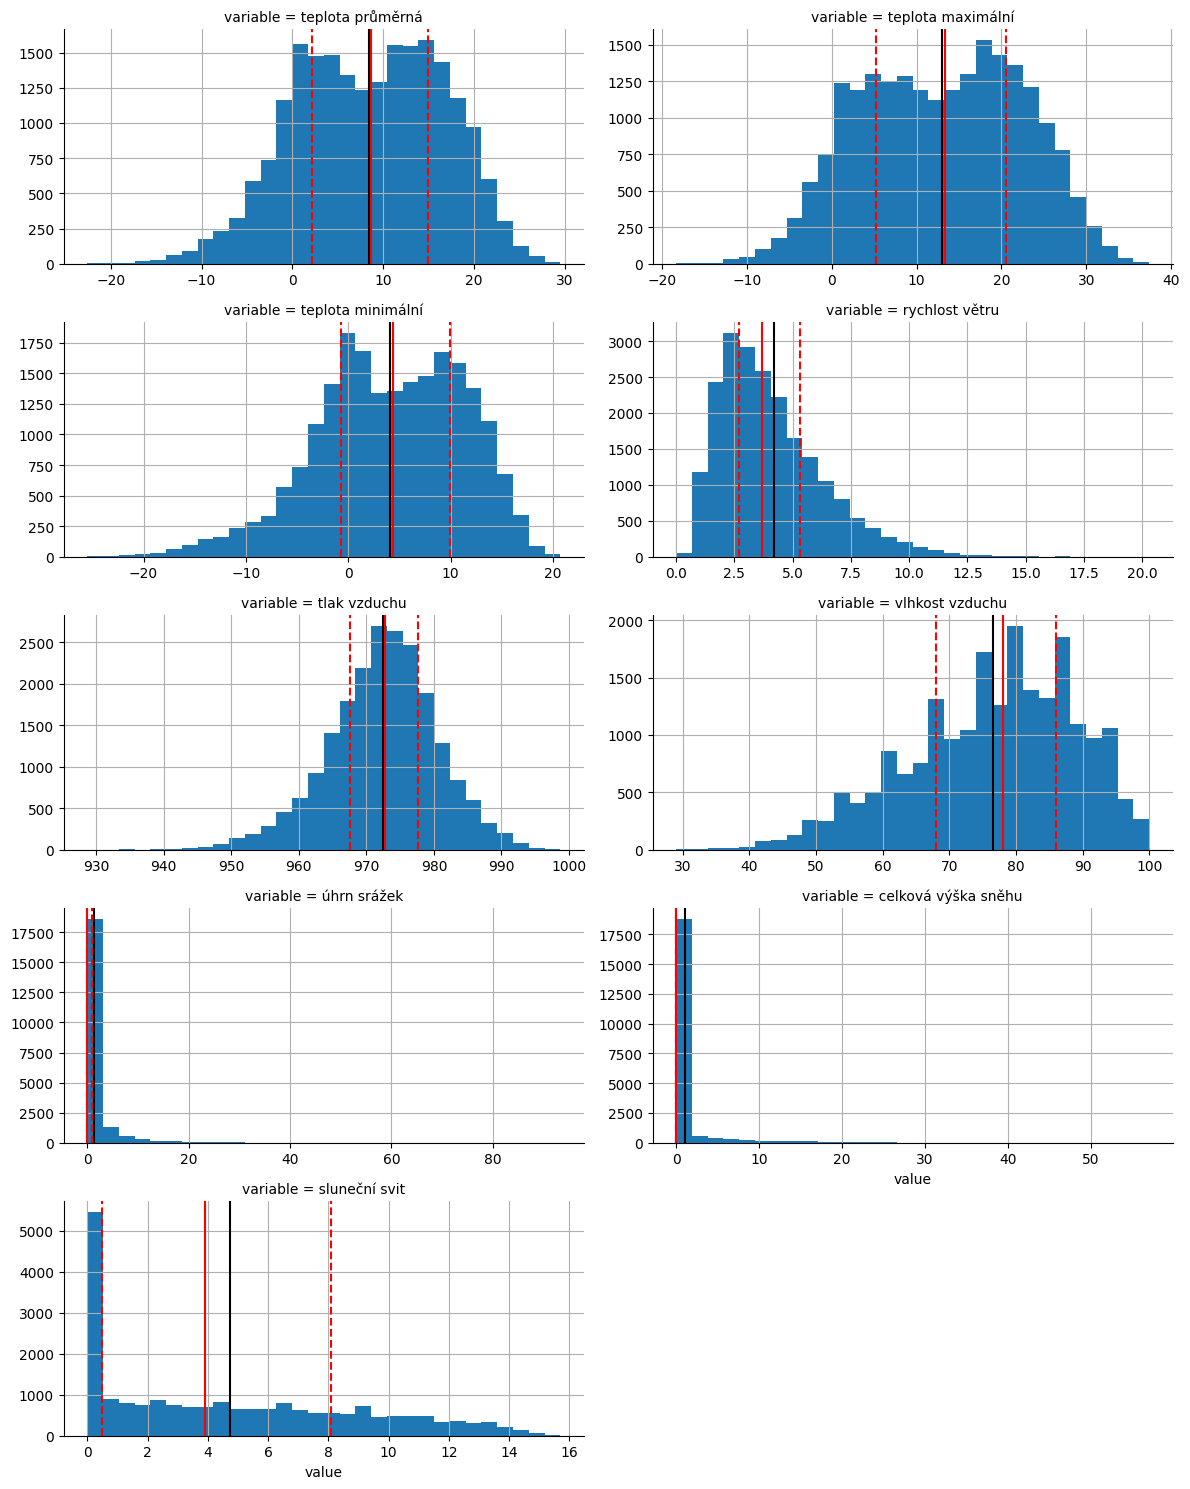

In [44]:
grid = sns.FacetGrid(
    ruzyne_tidy.melt(),
    col="variable",
    col_wrap=2,
    sharey=False,
    sharex=False,
    aspect=2,
)
grid.map(hist_plot_with_extras, "value");

/home/hansc/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



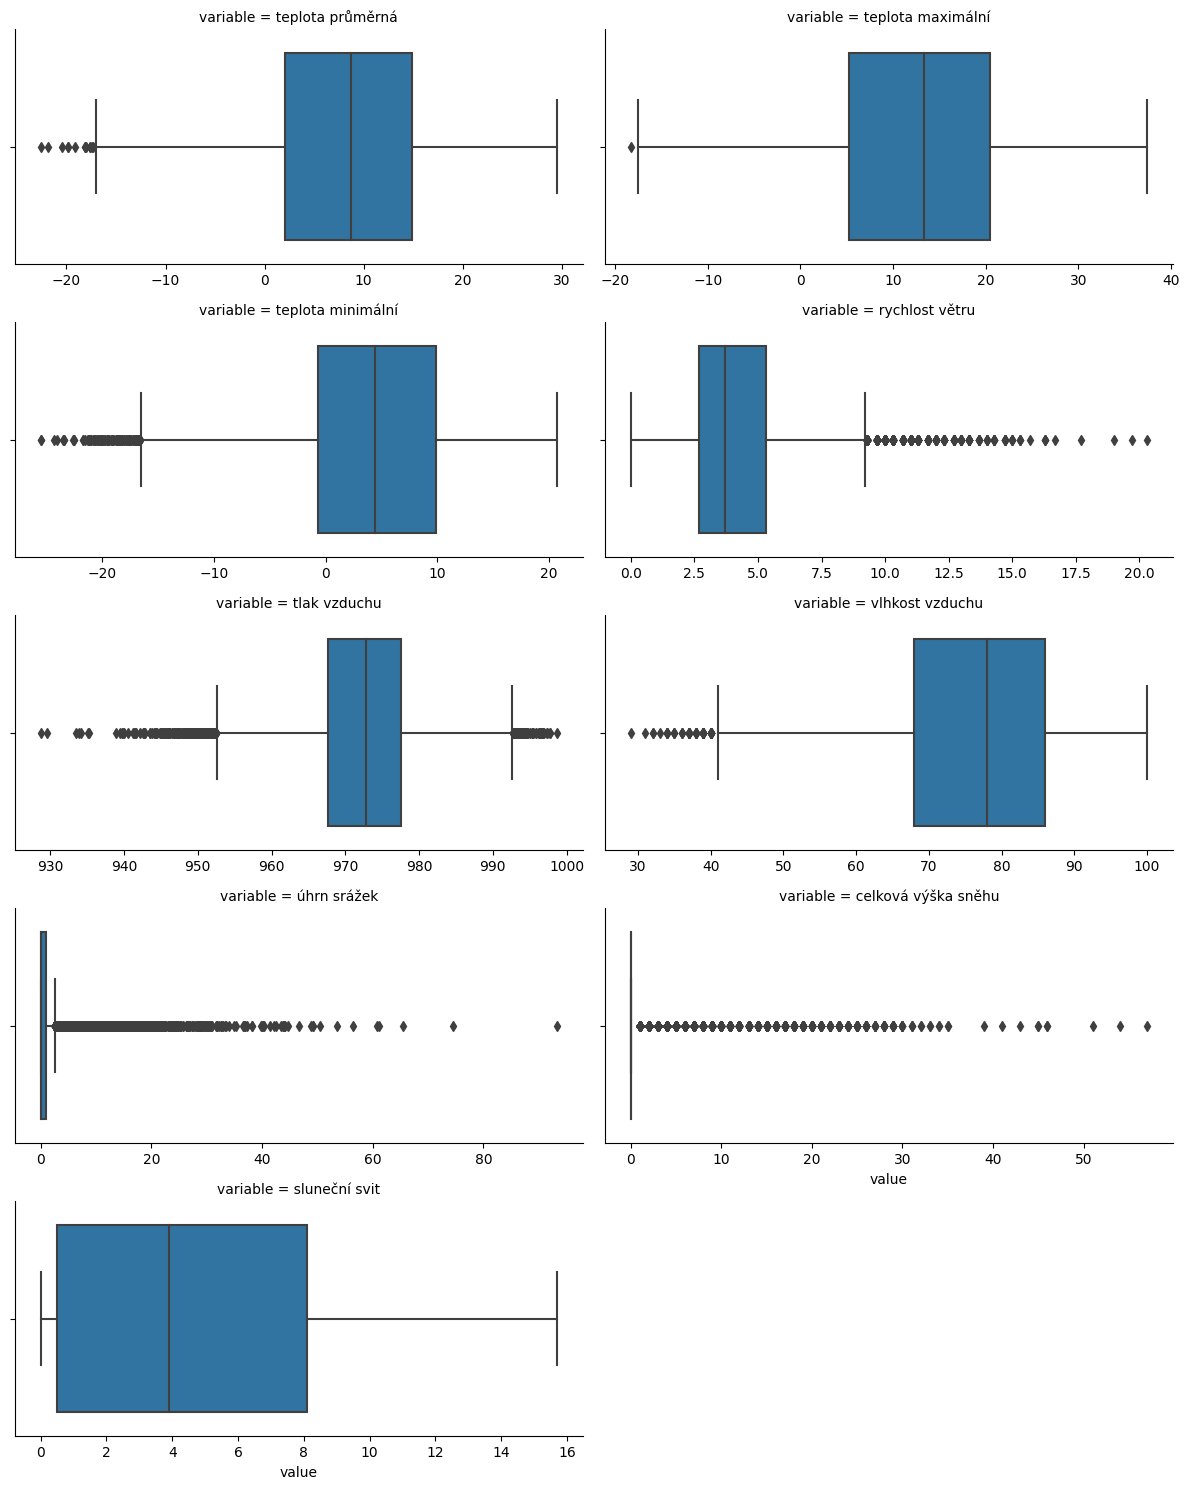

In [45]:
# Boxploty ze seaborn (sns):
grid = sns.FacetGrid(
    ruzyne_tidy.melt(),
    col="variable",
    col_wrap=2,
    sharey=False,
    sharex=False,
    aspect=2,
)
grid.map(sns.boxplot, "value");

Seaborn se často dá použít velice jednoduše, pokud zobrazujeme jednu veličinu, a někdy stráví i "wide-format" data. U našich dat můžeme takto porovnat průměrnou, minimální a maximální teplotu. Na pomoc si vezmeme catplot, který vytváří graf (nebo i sadu grafů) různých typů (boxplot nebo třeba violinplot) z dat obsahujících jednu či více kategorických proměnných.

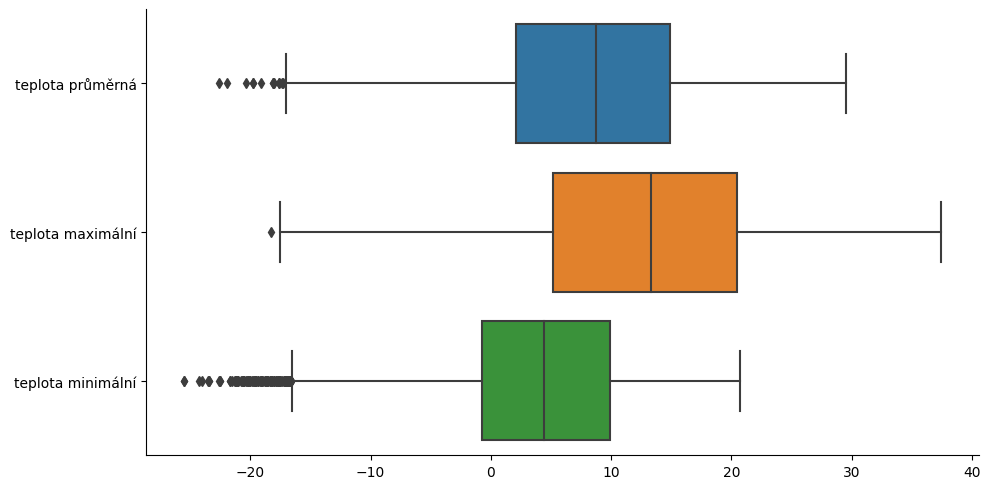

In [46]:
sns.catplot(
    data=ruzyne_tidy[["teplota průměrná", "teplota maximální", "teplota minimální"]],
    orient="h",
    kind="box",
    aspect=2,
);

Úkol: Doplňte vytvoření pomocných sloupců (jistě uhádnete jakého pandas-typu bude :) season a significant_precipitation. První definuje roční období (jen jednoduše podle kalendářních měsíců), drůhá označuje dny kdy byly srážky vyšší než v 90 % všech dní v našich datech (můžete zkusit i jiný limit).

Porovnejte numericky základní statistiky celého data setu a podmnožiny, kdy výrazně pršelo nebo sněžilo? Zvyšují v průměru srážky teplotu? A co maximální nebo minimální? A jak je to se standardní odchylkou?
Použijte sns.catplot pro vizuální srovnání distribučních funkcí pro jednotlivá roční období a dny s málo / hodně srážkami.

In [ ]:
season = ruzyne_tidy.index.month.map({
    1: "zima",
    2: "zima",
    3: "jaro",
    ___
 })

significant_precipitation = ruzyne_tidy["úhrn srážek"] > ruzyne_tidy[___].quantile(___)

In [ ]:
# úkol - jednoduché srovnání statistik pomocí rozdílu
(ruzyne_tidy.loc[___]
 .describe()
) - \
ruzyne_tidy.___()

In [ ]:
# úkol - vizuální srovnání statistik
sns.catplot(
    data=ruzyne_tidy.assign(
        significant_precipitation=___, 
        season=___,
    ),
    kind="box",
    aspect=2,
    hue=___,
    y=___,
    x=___,
);

In [47]:
# instance třídy DatetimeIndexResampler
ruzyne_yearly = ruzyne_tidy.resample("1Y")

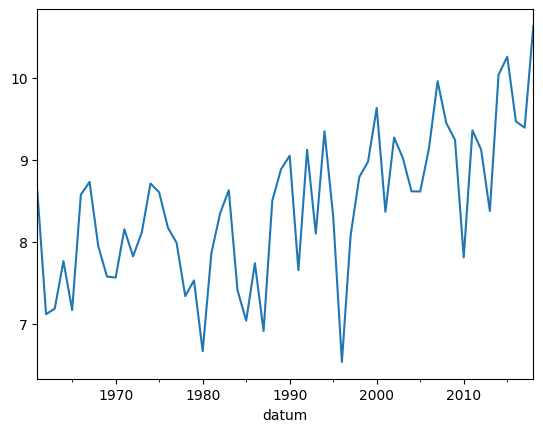

In [48]:
ruzyne_yearly["teplota průměrná"].mean().plot();

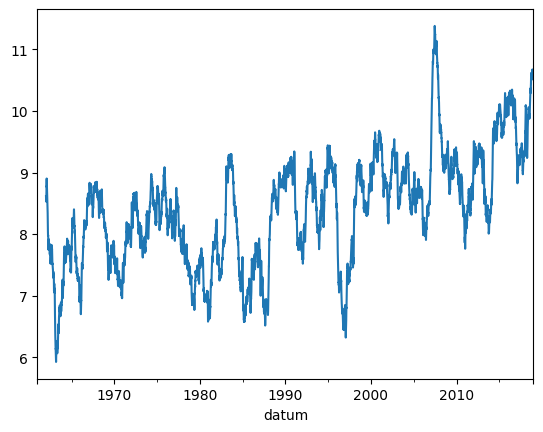

In [49]:
ruzyne_tidy["teplota průměrná"].rolling("365.25D", min_periods=365).mean().plot();